# Statistics for Astronomical Applications

### Abstract

We experimentally derive several characteristics of the Angell Hall telescope CCD. We measured various flat fields at varying integration times, dark frames at varying temperature, as well as many bias frames. Plotting the mean and the variance of the poisson noise of the flat fields, we find the gain to be 0.247694913008 e-/ADU, and the read noise to be 72.3489347186 e- rms. We additionally computed the gain and read noise through the rms in the difference between two frames, and found them to be: 0.445192486058 e-/ADU for gaiin, and 43.478367309 e- rms for the read noise. The values for the gain and read noise are quite different for these two different techniques, which may be attributed to the relatively low number of pixels on the CCD. The noise from the dark current was found to follow the functional form: $ S_{Dark} = A \cdot T^{3/2} \cdot e^{\frac{E_g}{2kT}}$, and parameter values for the constant A and band gap energy were derived from a fit of the temperature-count plot. Once identified and calculated, these CCD characteristics can be used extensively in actual data acquisition, in calibrating observation in order to minimize noise. These characterstic values, however, are quite poor when compared to professional CCDs, such as the MDM4K detector.

### Introduction

The use of charge coupled devices (CCDs) is seen is essentially all forms of modern, observational astronomy. Modern CCDs have a physical dimension, corresponding to "pixels", which individually collect electrons, which are ejected when a photon hits. Ideally, a CCD working perfectly woul produce a perfect correlational amount of electrons for every photon that his a pixel, and these electrons are perfectly accounted for when the ccd data is read into the computer. However, various sources of noise disturb this ideal, such as the read noise and dark current, discussed further in the next section. These sources of noise can be determined through the measurements of various frames, such as flat fields and dark frames. 

In addition to the noise, another point of interest regarding CCD is their physical and electrical properties. One of these properties, and limitation, of CCDs is the pixel well depth/capacity. This is the limitation of the amount of electrons a ccd pixel can hold. Once this limit is reachered, saturation of the CCD occurs, and often brings about a degredation of the image, such as image smearing and blooming, which tar the pixels of the image that is read out. A saturation level can typically be spotted easily, as the CCD has a strong linearity value for counts and integration time.

The goal of experiment  is to experimentally determine the characteristics of a specific CCD. The CCD under analysis here is housed by the 0.4-m Ritchey-Chretien reflector in the Angell Hall observatory. This work presents two laboratory observations which are used to characterize the gain, read noise, and dark noise of the CCD. We compare the characterizations of the Angell CCD to those of  the professional MDM4K detector. We also discuss the linearity of the CCD, and it's implications on the detector well-depth.

### Theory

The CCD has various significant noise processes, which each have distinctive mathematical models. First, the read noise of the CCD, as is evident by the name itself, is the noise associated with how the computer reads out the signal from the electron values in the CCD pixels. The read noise represents a technological limit for the CCD noise. Read noise is time-independent, as it does not increase for a certain frame or observation for longer times. Thus, it is much more significant in shorter exposure times than longer exposure times. Because of the read noise, there exists a bias level on the CCD, which is an initial signal offset on the CCD that keeps the number of counts above zero. Most importantly, the read noise is not poisson distributed, unlike the other sources of noise a CCD sees.

Another noise source is the Dark current. Dark current is essentially due to the thermal excitations of electrons accross the band gap of the ccd semiconductor. Thus, even with absolutely no flux shining on the detector, there can still be an accumulation of electrons on the chip due to the temperature. Because the dark current is theoretically random, it is well modeled by a poisson distribution


Another important source of noise that is inherent to any detector is the dark current.  Even without a signal present (i.e. without any flux on the detector) there can still be an accumulation of charge that is the result of thermal fluctuations generating charges on the chip. This is called the dark current.  Like with the bias, the dark current can be subtracted, however, there is still an uncertainty in the signal, which results in additional noise on the chip. The expression for the dark current is given by:

$$ S_{Dark} = A \cdot T^{3/2} \cdot e^{\frac{E_g}{2kT}}$$

where A is a constant with units of ADU/pixel/s, Eg semiconductor bandgap energy, and k is the Boltzman constant. From this expression, we see obviously the positive correlation the dark current has with temperature. The exponential part of the expression also shows the inverse dependence on band gap energy (the larger the band gap, the more work required for the electrons to cross it). 

Some other sources of noise include the background noise and the signal noise, both of which are also poisson noise. The total noise is then given by the sum of the individual noise sources in quadrature. 

An important value to keep in mind when discussing noise processes is the gain. The gain, which has units of electrons per ADU, is essentialy the conversion factor between electrons collected on the CCD, and the ADU number the computer converts the number of electrons to store. We can find the gain value of the CCD through the observations of flat fields, and the creation of a mean variance plot. Because the gain converts the ADU count to electron count, we have:
$S_e = g \cdot S_{ADU}$, where $S_e$ is the signal in units of electrons, and $S_{ADU}$ in ADU. The noise can then be written as: $N_e = g \cdot N_{ADU} = \sqrt{S_e}$. Thus, $g^2 \cdot N_{ADU}^2$ is equal to the signal in units of electrons, which in turn is equal to the gain times the signal in ADU. 

$$
\begin{align*}
g^2 \cdot N_{ADU}^2 &= S_e \\
&= g \cdot S_{ADU} \\
g \cdot N_{ADU}^2 &= S_{ADU} \\
\end{align*}
$$

Thus, the gain is just: 

$$g = \frac{S_{ADU}}{N_{ADU}^2}$$

which is simply the inverse of the slope of the plot of the mean signal in ADU ($S_{ADU}$) and the variance in ADU ($N_{ADU}^2$).

Note also that the plot of mean and variance (in ADU) has the read noise in ADU as the y intercept (assuming the bias value is subtracted from the data). This is because the read noise is simply the variace at an exposure time of zero. 

Another way to find the gain and read noise is through a simple calculation of the rms between two feild frames and bias frames. This is less robust than the mean-variance fit, however, as it only looks at the difference in two differnt field frames at the same exposure time. The expression to calculate the gain and read noise this way is given in the paper Massey & Jacoby 1992:

$$gain = \frac{(\bar{F_1} + \bar{F_2}) - (\bar{B_1} + \bar{B_2})}{\sigma_{F_1 - F_2}^2 - \sigma_{B_1 - B_2}^2}$$

$$r_{e-} = \frac{gain \cdot \sigma_{B_1-B_2}}{\sqrt{2}}$$

where $F_1$ and $F_2$ are the two flat field being averaged for the same exposure time, and $B_1$ and $B_2$ are the bias frames. The read noise is the simply calculated from the rms of the bias frames, converted from ADU to e- using the gain, and dividing by $\sqrt{2}$ to account for the two frames.

### Experiment and Methodology


We import the necessary various libraries.

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
from matplotlib import rcParams


Here, the 10 bias frames, taken alongside the flat fields, are imported as appended arrays, indexed under the variable "bias"

In [167]:
bias = []
for i in range(10):   # renamed the 10th bias file with all zeros, thus having digits from 0 - 9 instead of 1-10
    bias.append(fits.getdata("bias.0000000{}.fit".format(i) , ext=0).astype(np.int))

The ADU bias level of the CCD was computed, through taking the mean pixel ADU value from the combined image of the 10 bias frames. This was computed from the mean of all the individual pixels from all 10 frames - this is essentially equivalent to combining the 10 frames, and computing the mean at each pixel value, and then finding the mean for the combined frame. The equivalency of the computation is displayed below

In [168]:
bias_sum = np.concatenate([bias[0],bias[1],bias[2],bias[3],bias[4],bias[5],bias[6],bias[7],bias[8],bias[9]]) # Combines the 10 bias arrays into a single array
bias_m = bias_sum.mean() # compute the mean of the created combined array

bias_combine = sum(bias)/10    # Combine the frames by computing the average at each pixel from the 10 frames
bias_m2 = bias_combine.mean()   # Find the mean of the combined mean frame

print(bias_m, bias_m2)

11705.7953385 11705.7953385


In [196]:
plt.hist(bias_sum,50)
plt.xlabel("ADU")
plt.ylabel("number")
plt.title("Bias frame pixel distribution")
plt.show()

Histogram of the 10 frame pixel values, binned to a value of 50 ADU, with an approximate gaussian distribution. The mean of the histogram is 11705.795, which was computed above.

We then imported the flat frames below, taken over a range of integration time: 0.2 - 1.0, with a single exposure taken at 2 seconds, shown in the theory section.

In [326]:
flat_02 = []
for i in range(1,6):
    flat_02.append(fits.getdata("0.2_.0000000{}.fit".format(i), ext=0).astype(np.int)) 
flat_04 = []
for i in range(1,6):
    flat_04.append(fits.getdata("0.4_.0000000{}.fit".format(i), ext=0).astype(np.int))
flat_06 = []
for i in range(1,6):
    flat_06.append(fits.getdata("0.6_.0000000{}.fit".format(i), ext=0).astype(np.int))
flat_08 = []
for i in range(1,6):
    flat_08.append(fits.getdata("0.8_.0000000{}.fit".format(i), ext=0).astype(np.int))
flat_10 = []
for i in range(1,6):
    flat_10.append(fits.getdata("1.0_.0000000{}.fit".format(i), ext=0).astype(np.int))
flat_20 = []
flat_20.append(fits.getdata("2.0_.00000001.fit", ext=0).astype(np.int))

We then subtract the bias level from the flat fields. This is done so that when the fit parameters are computed for the mean-variance plot, the y intercept is at the correct ADU. If the bias is not subtracted, the y intercept will be measured at where the ADU level is zero, which is not be the actual zero exposure time adu count (due to the existence of the bias level obviously).

In [327]:
flat_02 = flat_02 - bias_m   # subtract bias value from each pixel value
flat_04 = flat_04 - bias_m
flat_06 = flat_06 - bias_m
flat_08 = flat_08 - bias_m
flat_10 = flat_10 - bias_m

In order to find the gain and read noise of the CCD from the various flat frames taken, a mean-variance plot "method" was used. As noted in the theory section, all the parameters of the total noise, added in quadrature, are poission distributed, with the exception of the read noise, which is time independent, and is due only to the act of reading the CCD. Thus, the variance of the pixel values of the subtracted image of flat frames should be poisson distributed, as the non-poisson noise is theoretically erased when subtracting the frames. Because of the unity linear relationship between the mean and variance of a poisson distribution, plotting the electron mean and variance should give a linear fit slope of 1. However, if we plot the mean and variance in units of ADU, the slope of the fit is the inverse of the gain, and the y intercept is the read noise.

Below, we computed the difference and average image of two flats with the same integration time. Arrays for fitting plots were created with the mean values. 

In [337]:
avg_02 = (sum(flat_02))/5
diff_02 = (flat_02[1]-flat_02[0])
avg_04 = (sum(flat_04))/5
diff_04 = (flat_04[1]-flat_04[0])
avg_06 = (sum(flat_06))/5
diff_06 = (flat_06[1]-flat_06[0])
avg_08 = (sum(flat_08))/5
diff_08 = (flat_08[1]-flat_08[0])
avg_10 = (sum(flat_10))/5
diff_10 = (flat_10[1]-flat_10[0])
flat_20 = np.array([flat_20])

S_02 = avg_02.mean()
S_04 = avg_04.mean()
S_06 = avg_06.mean()
S_08 = avg_08.mean()
S_10 = avg_10.mean()
S_20 = flat_20.mean()

N2_02 = diff_02.var()
N2_04 = diff_04.var()
N2_06 = diff_06.var()
N2_08 = diff_08.var()
N2_10 = diff_10.var()

S = np.array([S_02,S_04,S_06,S_08,S_10])
S_lin = np.array([S_02,S_04,S_06,S_08,S_10,S_20])
N2 = np.array([N2_02,N2_04,N2_06,N2_08,N2_10])

Below, histograms for the pixel values of the frames used to calulate mean values and standrad deviation values are plotted, to ensure gaussian distributions of the values.

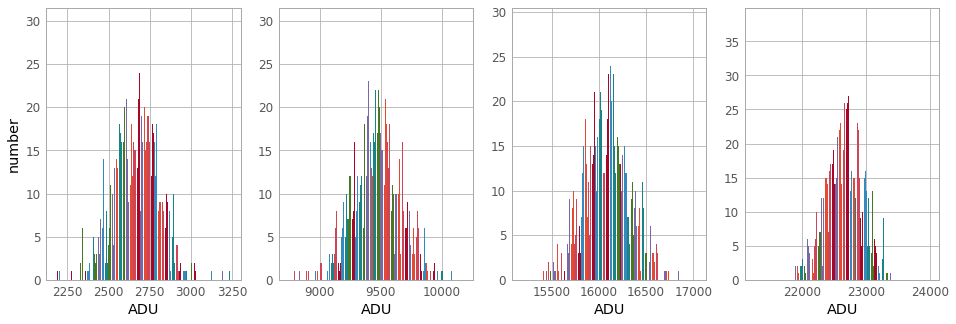

In [341]:
rcParams['figure.figsize'] = (16., 5.0)
plt.subplot(1,4,1)
flat_sum2 = np.concatenate([flat_02[0],flat_02[1],flat_02[2],flat_02[3],flat_02[4]])
plt.hist(flat_sum2,50)
plt.xlabel("ADU")
plt.ylabel("number")
plt.subplot(1,4,2)
flat_sum4 = np.concatenate([flat_04[0],flat_04[1],flat_04[2],flat_04[3],flat_04[4]])
plt.hist(flat_sum4,50)
plt.xlabel("ADU")
plt.subplot(1,4,3)
flat_sum6 = np.concatenate([flat_06[0],flat_06[1],flat_06[2],flat_06[3],flat_06[4]])
plt.hist(flat_sum6,50)
plt.xlabel("ADU")
plt.subplot(1,4,4)
flat_sum8 = np.concatenate([flat_08[0],flat_08[1],flat_08[2],flat_08[3],flat_08[4]])
plt.hist(flat_sum8,50)
plt.xlabel("ADU")


plt.show()

The histograms of the pixel values for the flat fields for 0.2 to 0.8 second exposures, by inspection, are well approximated by gaussian distributions, just as the bias frames were.

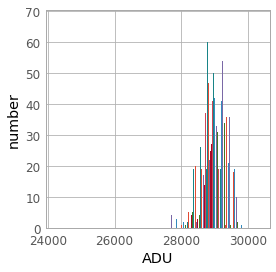

In [373]:
rcParams['figure.figsize'] = (4., 4.0)

flat_sum10 = np.concatenate([flat_10[0],flat_10[1],flat_10[2],flat_10[3],flat_10[4]])
plt.hist(flat_sum10,50)
plt.xlabel("ADU")
plt.ylabel("number")
plt.show()

On the other hand, the histogram of the 1 second exposure pixel values is not relatively gaussian. This is due to the saturation of the CCD at this exposure level, which we shall see later on in the linearity of the detector in the mean-variance plot. Thus, this exposure field is not used in the linear fit.

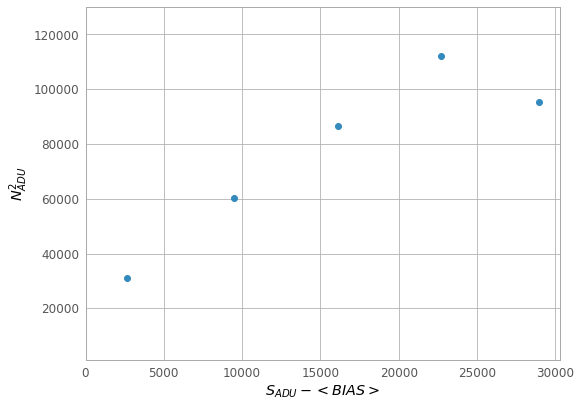

22677.4075789


In [369]:
rcParams['figure.figsize'] = (8.5, 6.5)

plt.scatter(S,N2)    # Plot mean- variance scatter data
plt.ylim(ymin = 1000)
plt.ylim(ymax = 130000)
plt.xlim(xmin = 0)
plt.xlabel("$S_{ADU} - <BIAS>$")
plt.ylabel("$N^2_{ADU}$")
plt.show()
print(S_08)

As was seen in the pixel value histograms, the flat fields with exposures from 0.2 to 0.8 seconds follow a tight, linear scaling of the mean and variance. This indicates that everything is operating normally, as the noise is expected to be poisson distributed, especially considering the subtraction of the frames which eliminates all but the poisson noise (ideally). Thus, the 1.0 second exposure having a lower variance value is expected of an oversaturated detector, due to things such as image smearing and blooming.

Thus, we can roughly estimate the linearity of the chip to be present in the flat fields up to 1 second exposure. We can then say that the ADU value at the 1 second exposure time is roughly the saturation level for the well capacity. In ADU, this value is ~29000 ADU. After measuring the gain value of the detector, we can estimate the well capacity of the detector in electrons, which is of greater physical significance.

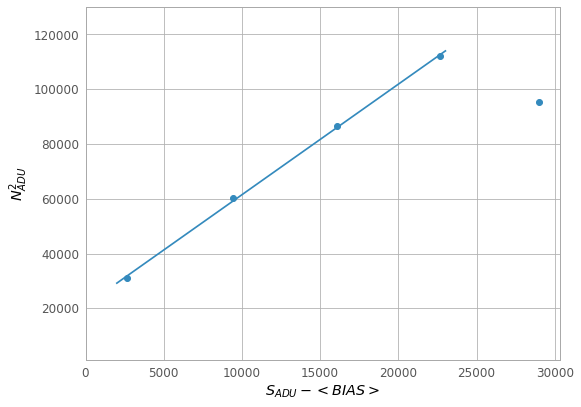

In [376]:
from scipy.optimize import curve_fit 
x_range = np.linspace(2000,23000,1000)
rcParams['figure.figsize'] = (8.5, 6.5)


m0,a0 = (0.5,-20000)   # parameter estimates
S_fit = np.array([S_02,S_04,S_06,S_08])
N2_fit = np.array([N2_02,N2_04,N2_06,N2_08])
coeffs, fiterr = curve_fit(y,S_fit,N2_fit,p0=(m0,a0))   # get the parameters from the fit
plt.scatter(S,N2)
plt.plot(x_range,y(x_range,*coeffs))  # overplot the fit
plt.ylim(ymin = 1000)
plt.ylim(ymax = 130000)
plt.xlim(xmin = 0)
plt.xlabel("$S_{ADU}-<BIAS>$")
plt.ylabel("$N^2_{ADU}$")
plt.show()


The plot above fits a linear curve to the mean-variance scatter plot, from the 0.2 to 0.8 integration times, as the 1.0 second integration variance is obviously not fit by a linear relation as meantioned above. 

In [371]:
print("The fit parameters (slope and y intercept) of the mean-variance plot: ",coeffs[0], "and", coeffs[1])

The fit parameters (slope and y intercept) of the mean-variance plot:  4.03722461578 and 21132.3207705


In [375]:
gain_exp = 1/coeffs[0]
read_exp = (coeffs[1] * gain_exp)**0.5

print("The read noise is: ",read_exp, "e- rms, and the gain value is: ", gain_exp, "e-/ADU")

The read noise is:  72.3489347186 e- rms, and the gain value is:  0.247694913008 e-/ADU


Although measuring the gain and read noise from a plot of the mean and variance from flat fields at differing exposures gives a robust estimation, we briefly calculate the gain and read noise through a simple computation from the rms of the difference between two frames, which we will compare with the original characteristic values we just derived from the mean-variance plot.

In [361]:
F1 = (flat_02[0] + bias_m).mean() # add the bias back to these frames, as the equation used assumes no bias subtraction
F2 = (flat_02[1] + bias_m).mean()
B1 = bias[0].mean()
B2 = bias[1].mean()
F_rms = (flat_02[0] - flat_02[1]).std()
B_rms = (bias[0] - bias[1]).std()
gain_thr = ((F1 + F2) - (B1 + B2))/(F_rms**2 - B_rms**2)

read_thr = gain*B_rms/(2**0.5)

print("The read noise is: ",read_thr, "e- rms, and the gain value is: ", gain_thr)

The read noise is:  43.478367309 e- rms, and the gain value is:  0.445192486058


We can see that the values off gain and read noise both differ by a factor of ~2. This is rather large - the difference may be due to the rather low pixel numbers of the ccd, preventing a large enough sample size. The values calculated from the mean - variance plot should be more accurate, as they are derived from flat fields at all of the exposure times, wheares the computational values were calculated from a single exposure time. We shall assume the mean - variance characteristic values, and assume the uncertainty in the measurement to be large.

With a gain value approximated to be 0.247694913008 e-/ADU, we can now find the well capacity in terms of electrons. The ADU value was around ~29000, thus the electron capacity for a pixel should be roughly 7200 electrons. 

### DARK CURRENT

Becuase the Angell Hall CCD is only cooled with a fan, rather than more advanced cooling technques such as using liquid nitrogen, the set point temperature is only around -16/14 degrees celcius. Thus, we would expect the dark current to be higher than highly advanced CCD cooled at extreme low temperatures, but it should not be significant. Also, since the dark current is linearly related with time, the small exposures we used are likely not going to be overwhelmed with the dark current. Additionally, the temperature part of the dark current expression is dwarfed by the constant A value.

For measuring the Dark current (noise) of the CCD, we first import the bias frames taken at each of the temperatures a dark frame was taken at.

In [362]:
bias_4 = []
for i in range(10):   # renamed the 10th bias file with all zeros, thus having digits from 0 - 9 instead of 1-10
    bias_4.append(fits.getdata("bias4.0000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
bias_7 = []
for i in range(10):   # renamed the 10th bias file with all zeros, thus having digits from 0 - 9 instead of 1-10
    bias_7.append(fits.getdata("bias7.0000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
bias_10 = []
for i in range(10):   # renamed the 10th bias file with all zeros, thus having digits from 0 - 9 instead of 1-10
    bias_10.append(fits.getdata("bias10.0000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
bias_13 = []
for i in range(10):   # renamed the 10th bias file with all zeros, thus having digits from 0 - 9 instead of 1-10
    bias_13.append(fits.getdata("bias13.0000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))
bias_16 = []
for i in range(10):   # renamed the 10th bias file with all zeros, thus having digits from 0 - 9 instead of 1-10
    bias_16.append(fits.getdata("bias16.0000000{}.HIP 79622.Bias.fit".format(i) , ext=0).astype(np.int))

bias_4comb = sum(bias_4)/10   # Combine the image as mean pixel values of all ten
bias_7comb = sum(bias_4)/10
bias_10comb = sum(bias_4)/10
bias_13comb = sum(bias_4)/10
bias_16comb = sum(bias_4)/10

bias4 = bias_4comb.mean()    # Find mean of the mean combined image
bias7 = bias_7comb.mean()
bias10 = bias_10comb.mean()
bias13 = bias_13comb.mean()
bias16 = bias_16comb.mean()


Below, the dark frame fits files are imported, and the bias is subtracted from each pixel, just as it was for the flat fields. The reason for doing so again has to do with the regression fit parameters. The mean of the bias subtracted frames are also calculated.

In [363]:
dark_4 = []
for i in range(1,6):
    dark_4.append(fits.getdata("dark4.0000000{}.HIP 79622.Dark.fit".format(i), ext=0).astype(np.int))
dark_7 = []
for i in range(1,6):
    dark_7.append(fits.getdata("dark7.0000000{}.HIP 79622.Dark.fit".format(i), ext=0).astype(np.int))
dark_10 = []
for i in range(1,6):
    dark_10.append(fits.getdata("dark10.0000000{}.HIP 79622.Dark.fit".format(i), ext=0).astype(np.int))
dark_13 = []
for i in range(1,6):
    dark_13.append(fits.getdata("dark13.0000000{}.HIP 79622.Dark.fit".format(i), ext=0).astype(np.int))
dark_16 = []
for i in range(1,6):
    dark_16.append(fits.getdata("dark16.0000000{}.HIP 79622.Dark.fit".format(i), ext=0).astype(np.int))

dark_4b = dark_4 - bias4  # Subtract the bias values from each dark temp array
dark_7b = dark_7 - bias7
dark_10b = dark_10 - bias10
dark_13b = dark_13 - bias13
dark_16b = dark_16 - bias16

dark_4bm = dark_4b.mean()   # Find mean value to plot with
dark_7bm = dark_7b.mean()
dark_10bm = dark_10b.mean()
dark_13bm = dark_13b.mean()
dark_16bm = dark_16b.mean()

Below, we plotted the scatter plot for the mean dark counts as a function of temperature.

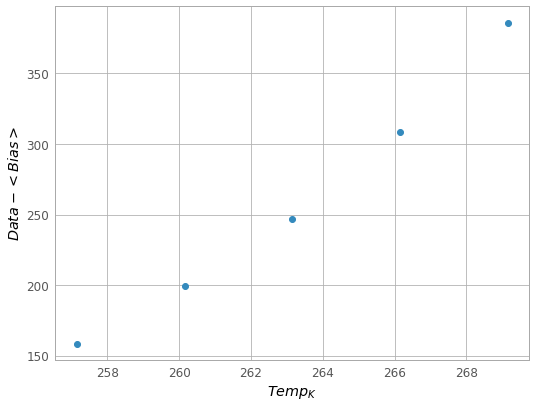

In [364]:
temp = np.array([-16,-13,-10,-7,-4]) + 273.15
dark = np.array([dark_16bm,dark_13bm,dark_10bm,dark_7bm,dark_4bm])
plt.scatter(temp,dark)
plt.xlabel("$Temp_K$")
plt.ylabel("$Data - <Bias>$")
plt.show()

Basic scatter plot of the mean dark counts as a function of kelvin temperature.

We then found the regression fit parameters of the expression of the dark noise, specifically the band gap energy and the constant A, shown below. The fit was overplotted on the scatter plot.

In [366]:
temp_range = np.linspace(start = -16.1,stop =  -3.8,num = 1000) + 273.15
def dark_fun(T,A,E):
    k = 8.61733034*10**(-5)
    return A*T**(3/2)*np.exp(-(E/(2*k*T)))

A0,E0 = (2e9,1.11)
coeffs1, fiterr = curve_fit(dark_fun, temp, dark, p0=(A0,E0))
plt.scatter(temp,dark)
plt.plot(temp_range,dark_fun(temp_range,*coeffs1))
plt.xlabel("$Temp_K$")
plt.ylabel("$Data - <Bias>$")
plt.show()

In [367]:
print("The constant value is: ",coeffs1[0], ", and the bang gap energy of Silicon is: ", coeffs1[1])

The constant value is:  4056509.15416 , and the bang gap energy of Silicon is:  0.819044918317


From the linear regression fit, we thus derived the experimental form of the dark counts for this particular CCD to be:

$$S_{dark} = 4.06\cdot 10^6 \cdot T^{3/2} \cdot e^{\frac{0.819}{2kT}}$$

From wikipedia, the band gap energy of Silicon is around 1.11 ev. Thus, the estimation of band gap energy from the regression fit has an error of about 26 percent. 

### Summary


In this experiment, we found the gain, read noise, and dark current noise of the Angell Hall ccd through flat field, dark frame, and bias measurements. We first found the gain and read noise through the creation of a mean-variance plot, taking advantage of the linearity between the mean and variance of poisson distributions. Taking the mean ADU counts and ADU variance, and subtracting the bias value, the gain was found from the inverse of the slope of the regression fit: 0.247694913008 e-/ADU, and the read noise was found from the y intercept of the fit: 72.3489347186 e- rms. Using alternative, computational expressions for the gain and read noise, we found them to be: 0.445192486058 e-/ADU for gaiin, and 43.478367309 e- rms for the read noise. The values for the gain and read noise vary by around a factor of two, indicating an uncertainty in the measurement, which may be attributed to the relatively low number of pixels on the CCD.

The linearity of the CCD was also analyzed. The linearity of the CCD from the flat fields was found to break at around an exposure of one second. From this, the CCD well depth/capcaity was estimated, both in terms of ADU (~29000 adu), and electrons (~7200 e-).

The dark current parameters were derived from a regression fit, of a plot of the temperature vs mean data - bias counts. From the regression fit, the paramaters returned a constant value A = 4056509.15416, and a band gap energy of SIlicon of 0.819 ev. The actual value of the band gap energy, taken from online sources, is 1.11 ev, which corresponds to an error around 26 percent in the parameter derived value of the energy. 

### Conclusions


Noticeably, the gain of the detector is less than 1, meaning more than one ADU is required for every single electron. The Read noise, which was around 72 e- rms, indicates a large read out noise, which will be significant for sall exposure time observations. The regression fit of dark count gives band gap energy of 0.8, which is somewhat close to actual value of 1.11, but has still a fair amount of error. Overall, the calculations of the CCD characteristics seem to have a large scatter/error. 

Most importantly, these calculated ccd characteristics show the extent to which the telescope can be made to make statistically significant astronomical observations, and also allows for data reduction by knowledge of the ccd noise characteristics. In the future, these values should be used to correctly reduce observational data taken using the teelscope.

The professional MDM4K detector has characteristic values of: gain = 2.2-2.4 electrons per ADU, read noise = 5 e- rms. The Angell Hall ccd, in comparison, has a read noise of ~72 e- rms, and a gain of ~0.2. The gain is much smaller as well, indicating it is not utilizing its well capacity - perhaps the low gain will help the measurements of the noise. 